# Fun with Pandas

We will use data from the [ergast API](https://ergast.com/mrd/) for the following examples.

[Ergast Postman collection with documentation](https://documenter.getpostman.com/view/11586746/SztEa7bL)

## What's a Dataframe again?
A **DataFrame** is composed of one or more **Series**. 
The names of the **Series** form the column names, and the row labels form the **Index**.

You may create a Dataframe in multiple ways, i.e.
* data from a file - df.read_csv(...)
* data from an API - df = pd.Dataframe(json_payload)
* data from a db
* ...



In [1]:
# first, install the requirements
%pip install -r ../requirements.txt >> results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import the needed libraries
import requests
import pandas as pd
import numpy as np

In [3]:
# analyse a sample

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'])

df.head()


,season,round,url,raceName,Circuit,date,time,FirstPractice,SecondPractice,ThirdPractice,Qualifying,Sprint
0,2022,1,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,Bahrain Grand Prix,"{'circuitId': 'bahrain', 'url': 'http://en.wik...",2022-03-20,15:00:00Z,"{'date': '2022-03-18', 'time': '12:00:00Z'}","{'date': '2022-03-18', 'time': '15:00:00Z'}","{'date': '2022-03-19', 'time': '12:00:00Z'}","{'date': '2022-03-19', 'time': '15:00:00Z'}",NaN
1,2022,2,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,Saudi Arabian Grand Prix,"{'circuitId': 'jeddah', 'url': 'http://en.wiki...",2022-03-27,17:00:00Z,"{'date': '2022-03-25', 'time': '14:00:00Z'}","{'date': '2022-03-25', 'time': '17:00:00Z'}","{'date': '2022-03-26', 'time': '14:00:00Z'}","{'date': '2022-03-26', 'time': '17:00:00Z'}",NaN
2,2022,3,http://en.wikipedia.org/wiki/2022_Australian_G...,Australian Grand Prix,"{'circuitId': 'albert_park', 'url': 'http://en...",2022-04-10,05:00:00Z,"{'date': '2022-04-08', 'time': '03:00:00Z'}","{'date': '2022-04-08', 'time': '06:00:00Z'}","{'date': '2022-04-09', 'time': '03:00:00Z'}","{'date': '2022-04-09', 'time': '06:00:00Z'}",NaN
3,2022,4,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,Emilia Romagna Grand Prix,"{'circuitId': 'imola', 'url': 'http://en.wikip...",2022-04-24,13:00:00Z,"{'date': '2022-04-22', 'time': '11:30:00Z'}","{'date': '2022-04-23', 'time': '10:30:00Z'}",NaN,"{'date': '2022-04-22', 'time': '15:00:00Z'}","{'date': '2022-04-23', 'time': '14:30:00Z'}"
4,2022,5,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,Miami Grand Prix,"{'circuitId': 'miami', 'url': 'http://en.wikip...",2022-05-08,19:30:00Z,"{'date': '2022-05-06', 'time': '18:30:00Z'}","{'date': '2022-05-06', 'time': '21:30:00Z'}","{'date': '2022-05-07', 'time': '17:00:00Z'}","{'date': '2022-05-07', 'time': '20:00:00Z'}",NaN


In [4]:
# pull the f1 2022 season races information from the ergast API

f1_races_2022 = {
    'season': [],
    'round': [],
    'circuit_id': [],
    'raceName': [],
    'url': [],
    'LAT': [],
    'LONG': [],
    'locality': [],
    'country': [],
    'date': [],
    'time': []
}

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
print(r)
j = r.json()

for item in j['MRData']['RaceTable']['Races']:
    try:
        f1_races_2022['season'].append(int(item['season']))
        f1_races_2022['round'].append(int(item['round']))
        f1_races_2022['circuit_id'].append(item['Circuit']['circuitId'])
        f1_races_2022['raceName'].append(item['raceName'])
        f1_races_2022['url'].append(item['url'])
        f1_races_2022['LAT'].append(float(item['Circuit']['Location']['lat']))
        f1_races_2022['LONG'].append(float(item['Circuit']['Location']['long']))
        f1_races_2022['locality'].append(item['Circuit']['Location']['locality'])
        f1_races_2022['country'].append(item['Circuit']['Location']['country'])
        f1_races_2022['date'].append(item['date'])
        f1_races_2022['time'].append(item.get('time'))
    except Exception as e:
        print(f'Error adding item: {item}')
        print(e)
        raise

f1_races_2022 = pd.DataFrame(f1_races_2022)
f1_races_2022

<Response [200]>


,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
2,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
3,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
4,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
5,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
6,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
7,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
8,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
9,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


In [120]:
# in order not to stress the API, use the backup file for the historical data
f1_races = pd.read_csv('./resources/f1_races.csv', index_col=0)

In [6]:
f1_races.head()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


### Series

In [7]:
f1_races.circuit_id

0        silverstone
1             monaco
2       indianapolis
3         bremgarten
4                spa
            ...     
1074          suzuka
1075        americas
1076       rodriguez
1077      interlagos
1078      yas_marina
Name: circuit_id, Length: 1079, dtype: object

### Columns

In [14]:
f1_races.columns

Index(['season', 'round', 'circuit_id', 'raceName', 'url', 'LAT', 'LONG',
       'locality', 'country', 'date', 'time'],
      dtype='object')

### Index

In [11]:
f1_races.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078],
           dtype='int64', length=1079)

### Inspect the data

In [12]:
f1_races.shape

(1079, 11)

### What are the column data types?

In [15]:
f1_races.dtypes

season          int64
round           int64
circuit_id     object
raceName       object
url            object
LAT           float64
LONG          float64
locality       object
country        object
date           object
time           object
dtype: object

### What does the data look like?

In [16]:
f1_races.head()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,NaN
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,NaN
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,NaN
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,NaN
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,NaN


In [17]:
f1_races.tail()

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1074,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,2022-10-09,05:00:00Z
1075,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,2022-10-23,19:00:00Z
1076,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,2022-10-30,20:00:00Z
1077,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,2022-11-13,18:00:00Z
1078,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,2022-11-20,13:00:00Z


### Information on the Dataframe

In [18]:
f1_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1079 non-null   int64  
 1   round       1079 non-null   int64  
 2   circuit_id  1079 non-null   object 
 3   raceName    1079 non-null   object 
 4   url         1079 non-null   object 
 5   LAT         1079 non-null   float64
 6   LONG        1079 non-null   float64
 7   locality    1079 non-null   object 
 8   country     1079 non-null   object 
 9   date        1079 non-null   object 
 10  time        348 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 101.2+ KB


In [19]:
f1_races[['season', 'date', 'country']].head()

,season,date,country
0,1950,1950-05-13,UK
1,1950,1950-05-21,Monaco
2,1950,1950-05-30,USA
3,1950,1950-06-04,Switzerland
4,1950,1950-06-18,Belgium


In [20]:
f1_races[1068:1076]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1068,2022,12,ricard,French Grand Prix,http://en.wikipedia.org/wiki/2022_French_Grand...,43.2506,5.79167,Le Castellet,France,2022-07-24,13:00:00Z
1069,2022,13,hungaroring,Hungarian Grand Prix,http://en.wikipedia.org/wiki/2022_Hungarian_Gr...,47.5789,19.24860,Budapest,Hungary,2022-07-31,13:00:00Z
1070,2022,14,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/2022_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,2022-08-28,13:00:00Z
1071,2022,15,zandvoort,Dutch Grand Prix,http://en.wikipedia.org/wiki/2022_Dutch_Grand_...,52.3888,4.54092,Zandvoort,Netherlands,2022-09-04,13:00:00Z
1072,2022,16,monza,Italian Grand Prix,http://en.wikipedia.org/wiki/2022_Italian_Gran...,45.6156,9.28111,Monza,Italy,2022-09-11,13:00:00Z
1073,2022,17,marina_bay,Singapore Grand Prix,http://en.wikipedia.org/wiki/2022_Singapore_Gr...,1.2914,103.86400,Marina Bay,Singapore,2022-10-02,12:00:00Z
1074,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.54100,Suzuka,Japan,2022-10-09,05:00:00Z
1075,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.64110,Austin,USA,2022-10-23,19:00:00Z


### Indexing
Use `iloc[]` to select rows and columns by their positions:

In [21]:
f1_races.iloc[1068:1076, [0, 2, 5, 6]]

,season,circuit_id,LAT,LONG
1068,2022,ricard,43.2506,5.79167
1069,2022,hungaroring,47.5789,19.24860
1070,2022,spa,50.4372,5.97139
1071,2022,zandvoort,52.3888,4.54092
1072,2022,monza,45.6156,9.28111
1073,2022,marina_bay,1.2914,103.86400
1074,2022,suzuka,34.8431,136.54100
1075,2022,americas,30.1328,-97.64110


Use `loc[]` to select by name:

In [22]:
f1_races.loc[1068:1076, 'season':'circuit_id']


,season,round,circuit_id
1068,2022,12,ricard
1069,2022,13,hungaroring
1070,2022,14,spa
1071,2022,15,zandvoort
1072,2022,16,monza
1073,2022,17,marina_bay
1074,2022,18,suzuka
1075,2022,19,americas
1076,2022,20,rodriguez


### Filtering
A **Boolean mask** is a array-like structure of Boolean values – it's a way to specify which rows/columns we want to select (True) and which we don't (False).

In [23]:
f1_races[f1_races['season'] == 2022]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1057,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1058,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
1059,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
1060,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
1061,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
1062,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
1063,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
1064,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
1065,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
1066,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


In [24]:
f1_races[(f1_races['season'] == 2022) & (f1_races['date'] < '2022-09-01')]

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1057,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1058,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
1059,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
1060,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
1061,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
1062,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
1063,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
1064,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
1065,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
1066,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


We can also use query instead:

In [25]:
f1_races.query("`season` == 2022 and `date` < '2022-09-01'")

,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
1057,2022,1,bahrain,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,26.0325,50.51060,Sakhir,Bahrain,2022-03-20,15:00:00Z
1058,2022,2,jeddah,Saudi Arabian Grand Prix,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,21.6319,39.10440,Jeddah,Saudi Arabia,2022-03-27,17:00:00Z
1059,2022,3,albert_park,Australian Grand Prix,http://en.wikipedia.org/wiki/2022_Australian_G...,-37.8497,144.96800,Melbourne,Australia,2022-04-10,05:00:00Z
1060,2022,4,imola,Emilia Romagna Grand Prix,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,44.3439,11.71670,Imola,Italy,2022-04-24,13:00:00Z
1061,2022,5,miami,Miami Grand Prix,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,25.9581,-80.23890,Miami,USA,2022-05-08,19:30:00Z
1062,2022,6,catalunya,Spanish Grand Prix,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,41.5700,2.26111,Montmeló,Spain,2022-05-22,13:00:00Z
1063,2022,7,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,2022-05-29,13:00:00Z
1064,2022,8,baku,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,40.3725,49.85330,Baku,Azerbaijan,2022-06-12,11:00:00Z
1065,2022,9,villeneuve,Canadian Grand Prix,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,45.5000,-73.52280,Montreal,Canada,2022-06-19,18:00:00Z
1066,2022,10,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/2022_British_Gran...,52.0786,-1.01694,Silverstone,UK,2022-07-03,14:00:00Z


### Statistics

In [119]:
# how many races were held in each country throughout the years?
f1_races.country.value_counts()

AttributeError: 'DataFrame' object has no attribute 'country'

In [27]:
# how many circuits in each season?
f1_races.season.value_counts()

2022    22
2021    22
2019    21
2018    21
2016    21
        ..
1956     8
1957     8
1961     8
1955     7
1950     7
Name: season, Length: 73, dtype: int64

In [45]:
# how many circuits between 1955 and 1975?

f1_races[((f1_races['season']) < 1975) & ((f1_races['season']) > 1955)]


,season,round,circuit_id,raceName,url,LAT,LONG,locality,country,date,time
48,1956,1,galvez,Argentine Grand Prix,http://en.wikipedia.org/wiki/1956_Argentine_Gr...,-34.6943,-58.45930,Buenos Aires,Argentina,1956-01-22,NaN
49,1956,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1956_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1956-05-13,NaN
50,1956,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1956_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1956-05-30,NaN
51,1956,4,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1956_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1956-06-03,NaN
52,1956,5,reims,French Grand Prix,http://en.wikipedia.org/wiki/1956_French_Grand...,49.2542,3.93083,Reims,France,1956-07-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,1974,11,nurburgring,German Grand Prix,http://en.wikipedia.org/wiki/1974_German_Grand...,50.3356,6.94750,Nürburg,Germany,1974-08-04,NaN
246,1974,12,red_bull_ring,Austrian Grand Prix,http://en.wikipedia.org/wiki/1974_Austrian_Gra...,47.2197,14.76470,Spielberg,Austria,1974-08-18,NaN
247,1974,13,monza,Italian Grand Prix,http://en.wikipedia.org/wiki/1974_Italian_Gran...,45.6156,9.28111,Monza,Italy,1974-09-08,NaN
248,1974,14,mosport,Canadian Grand Prix,http://en.wikipedia.org/wiki/1974_Canadian_Gra...,44.0481,-78.67560,Ontario,Canada,1974-09-22,NaN


### Continue with the race results

In [46]:
# analyse a sample
url = 'https://ergast.com/api/f1/2022/12/results.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'][0]['Results'])

df.head()

,number,position,positionText,points,Driver,Constructor,grid,laps,status,Time,FastestLap
0,1,1,1,25,"{'driverId': 'max_verstappen', 'permanentNumbe...","{'constructorId': 'red_bull', 'url': 'http://e...",2,53,Finished,"{'millis': '5402112', 'time': '1:30:02.112'}","{'rank': '2', 'lap': '30', 'Time': {'time': '1..."
1,44,2,2,18,"{'driverId': 'hamilton', 'permanentNumber': '4...","{'constructorId': 'mercedes', 'url': 'http://e...",4,53,Finished,"{'millis': '5412699', 'time': '+10.587'}","{'rank': '4', 'lap': '30', 'Time': {'time': '1..."
2,63,3,3,15,"{'driverId': 'russell', 'permanentNumber': '63...","{'constructorId': 'mercedes', 'url': 'http://e...",6,53,Finished,"{'millis': '5418607', 'time': '+16.495'}","{'rank': '3', 'lap': '51', 'Time': {'time': '1..."
3,11,4,4,12,"{'driverId': 'perez', 'permanentNumber': '11',...","{'constructorId': 'red_bull', 'url': 'http://e...",3,53,Finished,"{'millis': '5419422', 'time': '+17.310'}","{'rank': '5', 'lap': '45', 'Time': {'time': '1..."
4,55,5,5,11,"{'driverId': 'sainz', 'permanentNumber': '55',...","{'constructorId': 'ferrari', 'url': 'http://en...",19,53,Finished,"{'millis': '5430984', 'time': '+28.872'}","{'rank': '1', 'lap': '51', 'Time': {'time': '1..."


In [3]:
# get the latest race's results

f1_results_latest = {
    'season': [],
    'Round': [],
    'date': [],
    'circuit_id': [],
    'driver': [],
    'DATE_of_birth': [],
    'nationality': [],
    'constructor': [],
    'GriD': [],
    'tIME': [],
    'Status': [],
    'points': [],
    'podium': []
}

url_latest = 'https://ergast.com/api/f1/current/last/results.json'
r = requests.get(url_latest)
print(r)
j = r.json()

try:
    for item in j['MRData']['RaceTable']['Races'][0]['Results']:
        try:
            f1_results_latest['season'].append(int(j['MRData']['RaceTable']['Races'][0]['season']))
            f1_results_latest['Round'].append(int(j['MRData']['RaceTable']['Races'][0]['round']))
            f1_results_latest['date'].append(j['MRData']['RaceTable']['Races'][0]['date'])
            f1_results_latest['circuit_id'].append(j['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            f1_results_latest['driver'].append(item['Driver']['driverId'])
            f1_results_latest['DATE_of_birth'].append(item['Driver']['dateOfBirth'])
            f1_results_latest['nationality'].append(item['Driver']['nationality'])
            f1_results_latest['constructor'].append(item['Constructor']['constructorId'])
            f1_results_latest['GriD'].append(int(item['grid']))
            f1_results_latest['tIME'].append(int((item.get('Time') or {}).get('millis')) 
        if bool((item.get('Time') or {}).get('millis')) else None)
            f1_results_latest['Status'].append(item['status'])
            f1_results_latest['points'].append(item['points'])
            f1_results_latest['podium'].append(int(item['position']))
        except Exception as e:
            print(f'Error adding item: {item}')
            print(e)
            raise
except IndexError:
    print(f'Race has not happened yet... ')


f1_results_latest = pd.DataFrame(f1_results_latest)

f1_results_latest.head()

NameError: name 'requests' is not defined

In [6]:
# in order not to stress the API, use the backup file for the historical data

f1_results = pd.read_csv('./resources/f1_results.csv', index_col=0)

# the code that generated the backup files is available in the resouces section


In [49]:
f1_results.head()

,season,Round,date,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
0,1950,1,1950-05-13,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1
1,1950,1,1950-05-13,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2
2,1950,1,1950-05-13,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3
3,1950,1,1950-05-13,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4
4,1950,1,1950-05-13,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5


In [113]:
# find the dimensions (number of rows, number of columns) in the data

# len(f1_results.columns)
# len(f1_results.index)

f1_results.shape


(25207, 13)

In [65]:
# calculate summary statistics for nationality and points (median)
f1_results.groupby('nationality').mean()['points']

nationality
American             0.828073
American-Italian     0.000000
Argentine            1.925399
Argentine-Italian    0.000000
Australian           3.474042
Austrian             1.441776
Belgian              0.689165
Brazilian            1.771739
British              2.368809
Canadian             1.218894
Chilean              0.081081
Chinese              0.384615
Colombian            2.456000
Czech                0.000000
Danish               1.059524
Dutch                3.887821
East German          0.000000
Finnish              3.868700
French               1.161293
German               3.408817
Hungarian            0.050000
Indian               0.084746
Indonesian           0.000000
Irish                0.173913
Italian              0.620188
Japanese             0.415157
Liechtensteiner      0.000000
Malaysian            0.000000
Mexican              2.805353
Monegasque           5.918699
New Zealander        1.381378
Polish               2.767677
Portuguese           0.10810

In [78]:
# isolate the date, race name, driver and constructor for the 1999 season

f1_results_1 = f1_results[f1_results['season'] == 1999]
f1_results_1.loc[0:,['date', 'driver','constructor']]

,date,driver,constructor
15875,1999-03-07,irvine,ferrari
15876,1999-03-07,frentzen,jordan
15877,1999-03-07,ralf_schumacher,williams
15878,1999-03-07,fisichella,benetton
15879,1999-03-07,barrichello,stewart
...,...,...,...
16222,1999-10-31,gene,minardi
16223,1999-10-31,damon_hill,jordan
16224,1999-10-31,panis,prost
16225,1999-10-31,trulli,prost


In [114]:
# how many wins for McLaren between 1975 and 1985?

isolate_date = f1_results[((f1_results['season']) <= 1985) & ((f1_results['season']) >= 1975)]
# print(isolate_date)
isolate_mclaren = isolate_date[isolate_date['constructor'] == 'mclaren']
isolate_wins = isolate_mclaren[isolate_mclaren['podium'] == 1]['constructor'].count()
print(isolate_wins)



36


## Data cleaning

We'll be looking at creating, renaming, and dropping columns, type conversion and sorting - which will make working with this data easier

### Dropping columns
Our dataset may contain information that is not of interest for our analysis.

In [115]:
# from the f1_races df, let's remove the url column
mask = f1_races.columns.str.contains('url$', regex=True)
columns_to_drop = f1_races.columns[mask]
columns_to_drop

Index(['url'], dtype='object')

In [116]:
f1_races = f1_races.drop(columns=columns_to_drop)
f1_races.head()

""
0
1
2
3
4


In [117]:
# another way to do this is to select what we want to keep
mask = f1_races.columns.str.contains('url$|round', regex=True)
f1_races.loc[:,~mask]

""
0
1
2
3
4
...
1074
1075
1076
1077


In [121]:
# or simply
f1_races.drop('time', axis=1, inplace=True)

### Renaming columns
Some of the columns have weird names. Let's fix that.

In [122]:
f1_races.rename(
    columns={
        'raceName': 'race_name'
    },
    inplace=True # careful with this!
)
f1_races.columns

Index(['season', 'round', 'circuit_id', 'race_name', 'url', 'LAT', 'LONG',
       'locality', 'country', 'date'],
      dtype='object')

### Type conversion
Is there something weird about these columns?

In [124]:
f1_races.dtypes

season                 int64
round                  int64
circuit_id            object
race_name             object
url                   object
LAT                  float64
LONG                 float64
locality              object
country               object
date          datetime64[ns]
dtype: object

In [123]:
# date should be stored as datetime!
f1_races.loc[:, ['date']] = f1_races.loc[:, ['date']].apply(pd.to_datetime)
f1_races.dtypes

season                 int64
round                  int64
circuit_id            object
race_name             object
url                   object
LAT                  float64
LONG                 float64
locality              object
country               object
date          datetime64[ns]
dtype: object

In [125]:
# or
f1_races.loc[:, ['date']].astype({'date': 'datetime64[ns]'}).dtypes

date    datetime64[ns]
dtype: object

### Creating new columns
Let's create a 'race_month' column.

In [126]:
f1_races = f1_races.assign(
    race_month=lambda x: x.date.dt.month_name()
)

You can read more about Python lambda functions [here](https://realpython.com/python-lambda/).

In [127]:
f1_races.head()

,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,date,race_month
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,May
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,May
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,May
3,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,1950-06-04,June
4,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,1950-06-18,June


### Sorting

In [128]:
f1_races.sort_values(['race_name', 'date'], ascending=[False, True]).head()


,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,date,race_month
266,1976,3,long_beach,United States Grand Prix West,http://en.wikipedia.org/wiki/1976_United_State...,33.7651,-118.189,California,USA,1976-03-28,March
283,1977,4,long_beach,United States Grand Prix West,http://en.wikipedia.org/wiki/1977_United_State...,33.7651,-118.189,California,USA,1977-04-03,April
300,1978,4,long_beach,United States Grand Prix West,http://en.wikipedia.org/wiki/1978_United_State...,33.7651,-118.189,California,USA,1978-04-02,April
316,1979,4,long_beach,United States Grand Prix West,http://en.wikipedia.org/wiki/1979_United_State...,33.7651,-118.189,California,USA,1979-04-08,April
331,1980,4,long_beach,United States Grand Prix West,http://en.wikipedia.org/wiki/1980_United_State...,33.7651,-118.189,California,USA,1980-03-30,March


In [129]:
f1_races.nlargest(3, 'date')

,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,date,race_month
1078,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,2022-11-20,November
1077,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,2022-11-13,November
1076,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,2022-10-30,October


In [130]:
f1_races.nsmallest(3, 'date')


,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,date,race_month
0,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,1950-05-13,May
1,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,1950-05-21,May
2,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,1950-05-30,May


## Working with the index
We haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index
Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling set_index():

In [131]:
f1_races.set_index('date', inplace=True)
f1_races.head(3)

,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,race_month
date,,,,,,,,,,
1950-05-13,1950,1,silverstone,British Grand Prix,http://en.wikipedia.org/wiki/1950_British_Gran...,52.0786,-1.01694,Silverstone,UK,May
1950-05-21,1950,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,May
1950-05-30,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,May


In [132]:
f1_races.sort_index(inplace=True, ascending=False)
f1_races.head()

,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,race_month
date,,,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,November
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,November
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,October
2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,October
2022-10-09,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,October


`f1_races.sort_index(axis=1)` will sort the columns by name. 

The axis parameter is present throughout the pandas library: axis=0 targets rows and axis=1 targets columns.

In [133]:
f1_races['2022-10-23':'2022-11-20']


,season,round,circuit_id,race_name,url,LAT,LONG,locality,country,race_month
date,,,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,November
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,November
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,October
2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,October


In [134]:
# when not specifying a range
f1_races.loc['2022-10-30']

season                                                     2022
round                                                        20
circuit_id                                            rodriguez
race_name                                Mexico City Grand Prix
url           http://en.wikipedia.org/wiki/2022_Mexican_Gran...
LAT                                                     19.4042
LONG                                                   -99.0907
locality                                            Mexico City
country                                                  Mexico
race_month                                              October
Name: 2022-10-30 00:00:00, dtype: object

In [ ]:
f1_races.sort_index(inplace=True, ascending=True)
f1_races.head()

### Resetting the index


In [142]:
f1_races.reset_index(inplace=True)
f1_races.head()

,date,season,round,circuit_id,race_name,url,lat,long,locality,country,race_month
0,2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,November
1,2022-11-13,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,November
2,2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,October
3,2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,October
4,2022-10-09,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,October


### Reshaping the data


In [135]:
# lowercase all column names so the dataset is easier to work with
f1_races = f1_races.rename(columns=lambda x: x.lower())
f1_races.head()

,season,round,circuit_id,race_name,url,lat,long,locality,country,race_month
date,,,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,November
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,November
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,October
2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,October
2022-10-09,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,October


## Data visualisation

## Plotting with pandas

To embed SVG-format plots in the notebook, we will also call the %config and %matplotlib `inline` magics:

In [185]:
%config InlineBackend.figure_formats = ['svg']

You can read more about magics [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

<AxesSubplot:title={'center':'not very helpful'}, xlabel='date', ylabel='year'>

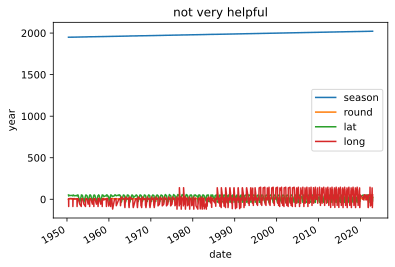

In [137]:
# the plot() method will generate line plots for all numeric columns by default
f1_races.plot(title='not very helpful', ylabel='year', alpha=1)

The `plot()` method returns an Axes object that can be modified further (e.g., to add reference lines, annotations, labels, etc.). Let's walk through an example.

In [138]:
f1_races.head()

,season,round,circuit_id,race_name,url,lat,long,locality,country,race_month
date,,,,,,,,,,
2022-11-20,2022,22,yas_marina,Abu Dhabi Grand Prix,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,24.4672,54.6031,Abu Dhabi,UAE,November
2022-11-13,2022,21,interlagos,Brazilian Grand Prix,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,-23.7036,-46.6997,São Paulo,Brazil,November
2022-10-30,2022,20,rodriguez,Mexico City Grand Prix,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,19.4042,-99.0907,Mexico City,Mexico,October
2022-10-23,2022,19,americas,United States Grand Prix,http://en.wikipedia.org/wiki/2022_United_State...,30.1328,-97.6411,Austin,USA,October
2022-10-09,2022,18,suzuka,Japanese Grand Prix,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,34.8431,136.5410,Suzuka,Japan,October


In [139]:
f1_races.tail(104)

,season,round,circuit_id,race_name,url,lat,long,locality,country,race_month
date,,,,,,,,,,
1962-06-03,1962,2,monaco,Monaco Grand Prix,http://en.wikipedia.org/wiki/1962_Monaco_Grand...,43.7347,7.42056,Monte-Carlo,Monaco,June
1962-05-20,1962,1,zandvoort,Dutch Grand Prix,http://en.wikipedia.org/wiki/1962_Dutch_Grand_...,52.3888,4.54092,Zandvoort,Netherlands,May
1961-10-08,1961,8,watkins_glen,United States Grand Prix,http://en.wikipedia.org/wiki/1961_United_State...,42.3369,-76.92720,New York State,USA,October
1961-09-10,1961,7,monza,Italian Grand Prix,http://en.wikipedia.org/wiki/1961_Italian_Gran...,45.6156,9.28111,Monza,Italy,September
1961-08-06,1961,6,nurburgring,German Grand Prix,http://en.wikipedia.org/wiki/1961_German_Grand...,50.3356,6.94750,Nürburg,Germany,August
...,...,...,...,...,...,...,...,...,...,...
1950-06-18,1950,5,spa,Belgian Grand Prix,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,50.4372,5.97139,Spa,Belgium,June
1950-06-04,1950,4,bremgarten,Swiss Grand Prix,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,46.9589,7.40194,Bern,Switzerland,June
1950-05-30,1950,3,indianapolis,Indianapolis 500,http://en.wikipedia.org/wiki/1950_Indianapolis...,39.7950,-86.23470,Indianapolis,USA,May


In [144]:
# bar plots would be more useful for this dataset
f1_races.set_index('date', inplace=True)
plot_data = f1_races['2018-03-25':'2022-11-20']\
    .assign(race_month_order=lambda x: x.index.month)\
    .pivot_table(index='race_month_order', columns='season', values='round', aggfunc='count')

f1_races.reset_index(inplace=True)
plot_data.head(10)
# plot_data.info()


season,2018,2019,2020,2021,2022
race_month_order,,,,,
3,1.0,2.0,NaN,1.0,2.0
4,3.0,2.0,NaN,1.0,2.0
5,2.0,2.0,NaN,3.0,3.0
6,2.0,3.0,NaN,3.0,2.0
7,4.0,2.0,3.0,2.0,4.0
8,1.0,1.0,4.0,2.0,1.0
9,3.0,4.0,3.0,3.0,2.0
10,3.0,2.0,2.0,2.0,4.0
11,2.0,2.0,3.0,3.0,2.0


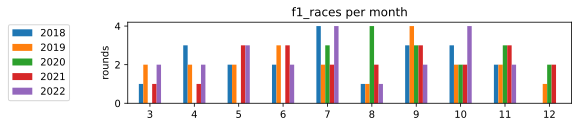

In [145]:
ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='rounds',
    figsize=(8, 1.5), title='f1_races per month'
)

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(-0.2, 0.5), ncol=1)

# Let's find out some stuff
Using the `f1_results` dataset.

In [179]:
# first, clean up the data in the f1_results dataframe

# lowercase all the columns so that they are easier to use

f1_results.columns= f1_results.columns.str.lower()
print(f1_results)

       season  round        date   circuit_id           driver date_of_birth  \
0        1950      1  1950-05-13  silverstone           farina    1906-10-30   
1        1950      1  1950-05-13  silverstone          fagioli    1898-06-09   
2        1950      1  1950-05-13  silverstone      reg_parnell    1911-07-02   
3        1950      1  1950-05-13  silverstone        cabantous    1904-10-08   
4        1950      1  1950-05-13  silverstone           rosier    1905-11-05   
...       ...    ...         ...          ...              ...           ...   
25202    2022     13  2022-07-31  hungaroring  kevin_magnussen    1992-10-05   
25203    2022     13  2022-07-31  hungaroring            albon    1996-03-23   
25204    2022     13  2022-07-31  hungaroring           latifi    1995-06-29   
25205    2022     13  2022-07-31  hungaroring          tsunoda    2000-05-11   
25206    2022     13  2022-07-31  hungaroring           bottas    1989-08-28   

      nationality constructor  grid    

In [180]:
# what columns are in this dataset?

f1_results.columns

Index(['season', 'round', 'date', 'circuit_id', 'driver', 'date_of_birth',
       'nationality', 'constructor', 'grid', 'time', 'status', 'points',
       'podium'],
      dtype='object')

In [182]:
# how many distinct drivers are in the dataset?

distinct_drivers = len(f1_results.groupby('driver'))
print(distinct_drivers)

832


In [177]:
# which of those drivers are Austrian?

f1_results.query("nationality == 'Austrian'").groupby('driver').count().index


Index(['berger', 'binder', 'ertl', 'friesacher', 'gartner', 'klien', 'koinigg',
       'lauda', 'marko', 'quester', 'ratzenberger', 'rindt', 'stuppacher',
       'wendlinger', 'wurz'],
      dtype='object', name='driver')

In [42]:
# what are the results from the latest race?

# hint: you may use the date column; convert it to datetime first!

f1_results = pd.read_csv('./resources/f1_results.csv', index_col=['date'], parse_dates = ['date'])
f1_results = f1_results.sort_index(ascending = False)
f1_results.head(1)

,Unnamed: 0,season,Round,circuit_id,driver,DATE_of_birth,nationality,constructor,GriD,tIME,Status,points,podium
date,,,,,,,,,,,,,
2022-07-31,25206,2022,13,hungaroring,bottas,1989-08-28,Finnish,alfa,8,NaN,Power Unit,0.0,20


In [63]:
# who won the race? how many races has this pilot won this year?

# hints:
# get the winner by filter inf f1_results on 'date' and 'podium';
# then use iloc[i][j] to access the first (and only) row (i) of the dataframe and the 'driver' column (j)
# winner = f1_results[ ... filters ... ].iloc[i][j]

f1_results = pd.read_csv('./resources/f1_results.csv', index_col=0, parse_dates = ['date'])

# winner = f1_results.sort_values(by = ['date', 'podium'], ascending = [False, True]).head(1)['driver']

# f1_results[(f1_results['driver'] == winner) & (f1_results['season'] = 2022) & (f1_results['podium'] == 1)].value_counts().sum()


# f1_results[f1_results['season'] == 2022 and f1_results['podium'] == 1].

# winner = f1_results[]


# f1_results.dtypes
# f1_results.query("'season' == 2022 and 'podium' == 1")


# use this ^ to filter f1_results on season, podium and driver
# and then count


In [ ]:
# on which circuit did Lewis Hamilton have the most wins?

# Formula 1 Driver Career Analysis
Let't analyse the career of one of the most succesful F1 drivers of all time.

Pick a driver from the list in [this article](https://www.redbull.com/ca-en/best-f1-drivers-of-all-time) and analyse their career below.

Or you can pick your favourite driver instead =)

In [64]:
# look for your driver's id in the list
f1_results['driver'].unique()

array(['farina', 'fagioli', 'reg_parnell', 'cabantous', 'rosier',
       'gerard', 'harrison', 'etancelin', 'hampshire', 'fry',
       'shawe_taylor', 'claes', 'fangio', 'kelly', 'bira', 'murray',
       'crossley', 'graffenried', 'chiron', 'martin', 'peter_walker',
       'rolt', 'leslie_johnson', 'ascari', 'sommer', 'villoresi',
       'gonzalez', 'manzon', 'trintignant', 'rol', 'schell', 'whitehead',
       'pian', 'parsons', 'holland', 'rose', 'green', 'bettenhausen',
       'chitwood', 'wallard', 'faulkner', 'george_connor', 'paul_russo',
       'flaherty', 'fohr', 'darter', 'hellings', 'mcgrath', 'ruttman',
       'hartley', 'davies', 'mcdowell', 'walt_brown', 'webb', 'hoyt',
       'ader', 'holmes', 'rathmann', 'banks', 'schindler', 'levrett',
       'cantrell', 'agabashian', 'bonetto', 'pagani', 'branca', 'levegh',
       'chaboud', 'pozzi', 'serafini', 'guy_mairesse', 'taruffi',
       'biondetti', 'louveau', 'comotti', 'sanesi', 'pietsch', 'moss',
       'fischer', 'abecassis

In [216]:
# which driver have you chosen?
driver = 'leclerc'

# what nationality is this driver?
nationality = f1_results.query("driver == @driver")['nationality'].head(1)
print(f"{driver}'s nationality is {nationality}")


leclerc's nationality is 23339    Monegasque
Name: nationality, dtype: object


In [217]:
# when was his first race and for which constructor?
f1_results = pd.read_csv('./resources/f1_results.csv', index_col=0, parse_dates = ['date'])
first_race_date = f1_results.query("driver == @driver").sort_values(by = 'date', ascending = False).head(1)['date']
first_race_constructor = f1_results.query("driver == @driver").sort_values(by = 'date', ascending = False).head(1)['constructor']
print(f"{driver}'s first race was on {first_race_date} with {first_race_constructor}")

leclerc's first race was on 25192   2022-07-31
Name: date, dtype: datetime64[ns] with 25192    ferrari
Name: constructor, dtype: object


In [218]:
# when was his first podium + with which constructor?
# keep in mind the driver may have been on the podium 0 times
pd.read_csv('./resources/f1_results.csv', index_col=0, parse_dates = ['date'])
# podiums = ...
first_podium_date = f1_results.query("driver == @driver and podium <= 3").sort_values(by='date', ascending = False).head(1)['date']
first_podium_constructor = f1_results.query("driver == @driver and podium <= 3").sort_values(by='date', ascending = False).head(1)['constructor']
print(f"{driver}'s first podium was on {first_podium_date} with {first_podium_constructor}")

leclerc's first podium was on 25147   2022-07-10
Name: date, dtype: datetime64[ns] with 25147    ferrari
Name: constructor, dtype: object


In [219]:
# what about his first win + with which constructor + which circuit?
# keep in mind the driver may have won 0 races
# first_win = 
# pd.read_csv('./resources/f1_results.csv', index_col=0, parse_dates = ['date'])
first_win_date = f1_results.query("driver == @driver and podium == 3").sort_values(by='date', ascending = False).head(1)['date']
first_win_constructor = f1_results.query("driver == @driver and podium == 3").sort_values(by='date', ascending = False).head(1)['constructor']
first_win_circuit = f1_results.query("driver == @driver and podium == 3").sort_values(by='date', ascending = False).head(1)['circuit_id']
print(f"{driver}'s first win was on {first_win_date} with {first_win_constructor} at {first_win_circuit}")

leclerc's first win was on 24229   2020-08-02
Name: date, dtype: datetime64[ns] with 24229    ferrari
Name: constructor, dtype: object at 24229    silverstone
Name: circuit_id, dtype: object


In [220]:
# how many race starts?
# hint: check the Status is NOT one of Did not qualify, Did not prequalify, Not classified
# pd.read_csv('./resources/f1_results.csv', index_col=0, parse_dates = ['date'])
race_starts = f1_results.query("driver == @driver and Status not in ['Did not qualify','Did not prequalify', 'Not classified']").count()['driver']
print(f"{driver} has {race_starts} race starts")

leclerc has 94 race starts


In [221]:
# how many of those races did he actually finished?
# hint: look for Status Finished; for this exercise, we'll not consider other statuses as successful
races_finished = f1_results.query("driver == @driver and Status == 'Finished'").count()['driver']
print(f"{driver} has finished {races_finished} races")

leclerc has finished 60 races


In [222]:
# how many has he won?
races_won = f1_results.query("driver == @driver and podium == 1").count()['driver']
print(f"{driver} has won {races_won} races")

leclerc has won 5 races


In [230]:
# create a dataframe that contains the follwing information:
#
# driver
# nationality
# season
# circuit_id
# race_started (Boolean)
# race_finished (Boolean)
# race_won (Boolean)
# constructor
# pd.read_csv('./resources/f1_results.csv', index_col=0, parse_dates = ['date'])
f1_results = f1_results.query("driver == @driver")
f1_results['race_finished'] = f1_results['Status'] == 'Finished'
f1_results['race_won'] = f1_results['podium'] == 1
f1_results['race_started'] = ~f1_results['Status'].isin(['Did not qualify','Did not prequalify', 'Not classified'])
f1_career = f1_results[['driver','nationality','season','circuit_id','constructor','race_won','race_finished','race_started']]
f1_career.head()

,driver,nationality,season,circuit_id,constructor,race_won,race_finished,race_started
23339,leclerc,Monegasque,2018,albert_park,sauber,False,True,True
23358,leclerc,Monegasque,2018,bahrain,sauber,False,False,True
23385,leclerc,Monegasque,2018,shanghai,sauber,False,True,True
23392,leclerc,Monegasque,2018,baku,sauber,False,True,True
23416,leclerc,Monegasque,2018,catalunya,sauber,False,False,True


## Plotting the results

In [224]:
# plot the race results per season

# prep the data
# f1_career['race_started'] = f1_career['race_started'].astype(int)
# f1_career['race_finished'] = f1_career['race_finished'].astype(int)
# f1_career['race_won'] = f1_career['race_won'].astype(int)

plot_data_wins = f1_career.pivot_table(index="season", columns="driver", values="race_won", aggfunc="sum")
plot_data_start = f1_career.pivot_table(index="season", columns="driver", values="race_started", aggfunc="sum")


<AxesSubplot:title={'center':"leclerc's F1 Wins"}, xlabel='season', ylabel='races'>

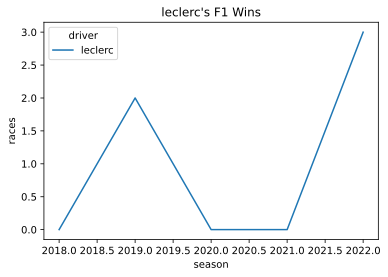

In [225]:
plot_data_wins.plot(title=f"{driver}'s F1 Wins", ylabel="races")

<AxesSubplot:title={'center':"leclerc's F1 Race Starts"}, xlabel='season', ylabel='races'>

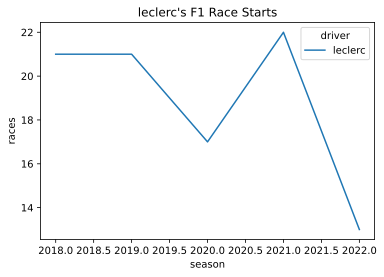

In [226]:
plot_data_start.plot(title=f"{driver}'s F1 Race Starts", ylabel="races")

### Combine the plots

In [227]:
from functools import reduce

plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["season"], how='inner'), [plot_data_start, plot_data_wins])
plot_data.rename(
    columns={
        f"{driver}_x": "starts",
        f"{driver}_y": "wins"
    }, inplace=True)
plot_data.head()

driver,starts,wins
season,,
2018,21,0
2019,21,2
2020,17,0
2021,22,0
2022,13,3


<AxesSubplot:title={'center':"leclerc's F1 Career"}, xlabel='season', ylabel='races'>

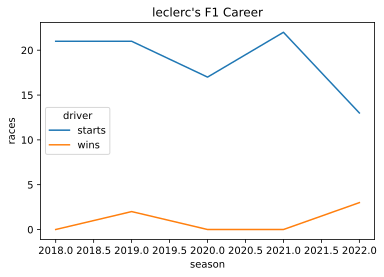

In [228]:
plot_data.plot(title=f"{driver}'s F1 Career", ylabel="races")

### Export the results

In [229]:
# explore more possibilities to store the results, e.g. to_sql()
f1_career.to_csv(f"./results/f1_career_{driver}.csv", index=False)

# Further reading
* [Loading a Dataframe from a SQL database](https://pythonspeed.com/articles/pandas-sql-chunking/)
* [Connecting to Redshift from Python](https://docs.aws.amazon.com/redshift/latest/mgmt/python-connect-examples.html)
* [Pandas I/O](https://pandas.pydata.org/docs/reference/io.html)